In [2]:
import os
import shutil
import random
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
from sklearn.model_selection import train_test_split
from pathlib import Path
# from public_tests import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'lr_utils'

In [3]:
# STEP 1: Set the correct paths based on your current working directory
bad_folder = "dataset/Bad"
good_folder = "dataset/Good"

# STEP 2: Check if these directories exist
print(f"Bad folder exists: {os.path.exists(bad_folder)}")
print(f"Good folder exists: {os.path.exists(good_folder)}")

# Only proceed if both folders exist
if os.path.exists(bad_folder) and os.path.exists(good_folder):
    # STEP 3: Get all image file names, but filter out directories
    bad_images = [f.name for f in Path(bad_folder).iterdir() if f.is_file()]
    good_images = [f.name for f in Path(good_folder).iterdir() if f.is_file()]
    
    print(f"Found {len(bad_images)} files in Bad folder")
    print(f"Found {len(good_images)} files in Good folder")
    
    # STEP 4: Split Bad images
    bad_train, bad_test = train_test_split(bad_images, test_size=0.2)
    print(f"total bad train and bad test {len(bad_train)} {len(bad_test)}")
    
    # STEP 5: Split Good images  
    good_train, good_test = train_test_split(good_images, test_size=0.2)
    print(f"total good train and good test {len(good_train)} {len(good_test)}")
    
    # STEP 6: Create new folders
    os.makedirs("train_x", exist_ok=True)
    os.makedirs("train_y", exist_ok=True)
    os.makedirs("test_x", exist_ok=True)
    os.makedirs("test_y", exist_ok=True)
    # STEP 7: Copy files
    # Copy training images
    for img in bad_train:
        shutil.copy(os.path.join(bad_folder, img), os.path.join("train_x", img))
    for img in good_train:
        shutil.copy(os.path.join(good_folder, img), os.path.join("train_x", img))
    
    # Copy test images
    for img in bad_test:
        shutil.copy(os.path.join(bad_folder, img), os.path.join("test_x", img))
    for img in good_test:
        shutil.copy(os.path.join(good_folder, img), os.path.join("test_x", img))
    
    print("Done! Check train_x and test_x folders")
else:
    print("Error: One or both folders don't exist. Please check the paths.")

Bad folder exists: True
Good folder exists: True
Found 950 files in Bad folder
Found 950 files in Good folder
total bad train and bad test 760 190
total good train and good test 760 190
Done! Check train_x and test_x folders


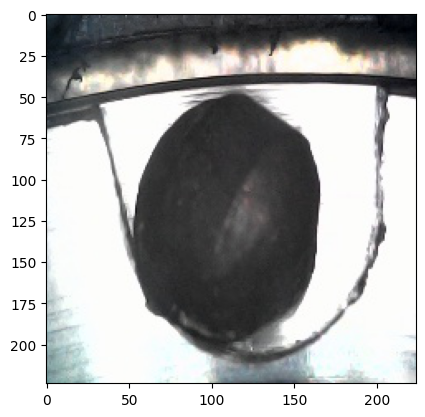

In [4]:
# specify the index to check whether images load or not
index = 123
# specify the complete path to the image directory
image_directory = "dataset/Bad"  # Update this path!

# Combine directory path with filename
image_filename = bad_train[index]  # This is just 'bad_0637.jpg'
full_image_path = os.path.join(image_directory, image_filename)

# Check if file exists before opening
if os.path.exists(full_image_path):
    # Load the image using PIL
    img = Image.open(full_image_path)
    
    # Display the image
    plt.imshow(np.array(img))
    plt.axis('on')  # Optional: hide axis
    plt.show()
else:
    print(f"Image file not found: {full_image_path}")
    print("Please check the image directory path and filename.")

In [5]:
# STEP 1: Load images from train_x folder
folder_path = "train_x"
image_files = os.listdir(folder_path)

# Let's check what we found
print(f"Total files in folder: {len(image_files)}")
print("First 10 files:", image_files[:10])

# STEP 2: Create list to store all images
train_x = []
train_paths = []
for image_file in image_files:
    path = os.path.join(folder_path, image_file)
    # Load and resize image
    img = Image.open(f"{folder_path}/{image_file}")
    img = img.resize((64, 64))
    
    # Convert to grayscale
    img = img.convert('L')
    
    img_array = np.array(img)
    train_x.append(img_array)
    train_paths.append(path)
# STEP 3: Create train_set_x like you wanted
train_set_x = np.array(train_x[:])

print(f"train_set_x shape: {train_set_x.shape}")
print("Done! Your train_set_x is ready")
print(train_paths[1524])

Total files in folder: 1900
First 10 files: ['good_0378.jpg', 'good_0350.jpg', 'good_0436.jpg', 'good_0422.jpg', 'good_0344.jpg', 'bad_0371.jpg', 'bad_0417.jpg', 'bad_0403.jpg', 'bad_0365.jpg', 'good_0393.jpg']
train_set_x shape: (1900, 64, 64)
Done! Your train_set_x is ready
train_x/bad_0796.jpg


In [6]:
# Create labels based on filenames
labels = []
for image_file in image_files:
    if image_file.startswith('good'):
        labels.append(1)  # Good = 1
    else:  # bad images
        labels.append(0)  # Bad = 0

# Convert to numpy array and reshape to (1, 2015)
train_set_y = np.array(labels).reshape(1, -1)

print(f"train_set_y shape: {train_set_y.shape}")


train_set_y shape: (1, 1900)


In [7]:
# STEP 2: Load images from test_x folder
folder_path = "test_x"
# Filter out directories and hidden files
image_files = sorted([f for f in os.listdir(folder_path) 
                     if os.path.isfile(os.path.join(folder_path, f)) 
                     and not f.startswith('.')])

print(f"Total test files: {len(image_files)}")
print("First 5 files:", image_files[:5])

# STEP 2: Create list to store test images
test_x = []
test_paths=[]

for image_file in image_files:
    path = os.path.join(folder_path, image_file)
    # Load and resize image
    img = Image.open(path)  # Use the path variable directly
    img = img.resize((64, 64))
    
    # Convert to grayscale
    img = img.convert('L')
    
    img_array = np.array(img)
    test_x.append(img_array)
    test_paths.append(path)

# STEP 3: Create test_set_x
test_set_x = np.array(test_x[:])

# STEP 4: Create test_set_y (labels)
labels = []
for image_file in image_files:
    if image_file.startswith('good'):
        labels.append(1)  # Good = 1
    else:  # bad images
        labels.append(0)  # Bad = 0

# Convert to shape (1, number_of_test_images)
test_set_y = np.array(labels).reshape(1, -1)

print(f"test_set_x shape: {test_set_x.shape}")
print(f"test_set_y shape: {test_set_y.shape}")
print("Done! Your test sets are ready")
print(test_paths[1534] if len(test_paths) > 1534 else "Index 1534 is out of range")

Total test files: 1895
First 5 files: ['bad_0001.jpg', 'bad_0002.jpg', 'bad_0003.jpg', 'bad_0004.jpg', 'bad_0005.jpg']
test_set_x shape: (1895, 64, 64)
test_set_y shape: (1, 1895)
Done! Your test sets are ready
test_x/good_0581.jpg


In [8]:
train_set_x_flatten = train_set_x.reshape(train_set_x.shape[0], -1).T
test_set_x_flatten = test_set_x.reshape(test_set_x.shape[0], -1).T

In [9]:
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (4096, 1900)
train_set_y shape: (1, 1900)
test_set_x_flatten shape: (4096, 1895)
test_set_y shape: (1, 1895)


In [10]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

In [11]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [12]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [13]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 12
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)


In [14]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1" : W1,
                  "b1" : b1,
                  "W2" : W2,
                  "b2" : b2}
    return parameters


In [15]:
np.random.seed(2)
n_x, n_h, n_y = layer_sizes(train_set_x, train_set_y)
# n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)

In [16]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    assert(A2.shape == (1, X.shape[1]))
    cache = {"Z1" : Z1,
             "A1" : A1,
             "Z2" : Z2,
             "A2" : A2}
    return A2, cache

In [17]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -1 / m * np.sum(logprobs)
    cost = float(np.squeeze(cost))
    return cost

In [18]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2 - Y
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1 / m * np.dot(dZ1, X.T)
    db1 = 1 / m * np.sum(dZ1, axis = 1, keepdims = True)

    grads = {"dW1" : dW1,
             "db1" : db1,
             "dW2" : dW2,
             "db2" : db2
            }
    return grads

In [19]:
def update_parameters(parameters, grads, learning_rate = 0.01):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1" : W1,
                  "b1" : b1,
                  "W2" : W2,
                  "b2" : b2,
                 }
    return parameters

In [20]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(3)

    # Get layer sizes
    n_x, _, n_y = layer_sizes(X, Y)

    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)

    # Training loop
    for i in range(num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)

        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    return parameters

In [21]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5).astype(int)
    return predictions

In [22]:
parameters = nn_model(train_set_x,train_set_y, n_h = 2, num_iterations=10000, print_cost=True)

Cost after iteration 0: 0.692956
Cost after iteration 1000: 0.220766
Cost after iteration 2000: 0.173932
Cost after iteration 3000: 0.143642
Cost after iteration 4000: 0.121689
Cost after iteration 5000: 0.092738
Cost after iteration 6000: 0.103281
Cost after iteration 7000: 0.077935
Cost after iteration 8000: 0.068744
Cost after iteration 9000: 0.077639


In [23]:
predictions_train = predict(parameters, train_set_x)  # predict labels for training set

correct_predictions = (np.dot(train_set_y, predictions_train.T) +
                       np.dot(1 - train_set_y, 1 - predictions_train.T)).item()

accuracy = float(correct_predictions) / train_set_y.size * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 98.11%
